In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import random
import numpy as np

In [56]:
eicu2 = pd.read_csv('smooth_bp_eicu2.csv')
SAL = pd.read_csv('salzburg.csv')

In [57]:
unique_eicu = eicu2['unittype_x'].unique()
unique_eicu

array(['Med-Surg ICU', 'CTICU', 'Neuro ICU', 'CSICU', 'MICU',
       'Cardiac ICU', 'CCU-CTICU', 'SICU'], dtype=object)

In [58]:
MICU = eicu2[eicu2['unittype_x'] == 'MICU']
SICU = eicu2[eicu2['unittype_x'] == 'SICU']
MED = eicu2[eicu2['unittype_x'] == 'Med-Surg ICU']


In [59]:
micu_first_target_df = MICU[(MICU['cur_bp'] >= 60) & (MICU['cur_bp'] <= 70)]
sicu_first_target_df = SICU[(SICU['cur_bp'] >= 60) & (SICU['cur_bp'] <= 70)]
med_first_target_df = MED[(MED['cur_bp'] >= 60) & (MED['cur_bp'] <= 70)]
sal_first_target_df = SAL[(SAL['cur_bp'] >= 60) & (SAL['cur_bp'] <= 70)]


micu_first_target_dict = micu_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sicu_first_target_dict = sicu_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
med_first_target_dict = med_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sal_first_target_dict = sal_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()


micu_first_target_dict = {key: value for key, value in micu_first_target_dict.items() if value >= 0}
sicu_first_target_dict = {key: value for key, value in sicu_first_target_dict.items() if value >= 0}
med_first_target_dict = {key: value for key, value in med_first_target_dict.items() if value >= 0}
sal_first_target_dict = {key: value for key, value in sal_first_target_dict.items() if value >= 0}



In [60]:
med_first_target_dict

{243334: 91,
 243643: 93,
 244256: 234,
 245811: 105,
 248581: 9,
 249329: 189,
 250828: 815,
 251140: 306,
 251194: 179,
 251926: 74,
 252312: 741,
 252473: 69,
 252578: 181,
 252589: 26,
 252776: 102,
 255112: 385,
 255637: 19,
 257212: 113,
 257307: 234,
 257390: 66,
 257535: 82,
 257889: 981,
 257890: 622,
 257891: 138,
 257892: 239,
 258091: 125,
 258884: 86,
 259941: 160,
 260882: 196,
 261844: 277,
 262893: 53,
 263815: 220,
 263855: 172,
 264221: 391,
 264459: 32,
 264849: 37,
 265482: 96,
 267666: 26,
 269084: 222,
 269226: 75,
 269403: 136,
 270217: 133,
 271043: 32,
 272336: 279,
 272551: 134,
 272740: 121,
 273140: 192,
 274461: 276,
 274595: 42,
 275796: 56,
 276614: 95,
 276742: 705,
 276743: 891,
 277354: 137,
 279434: 447,
 279592: 87,
 280288: 152,
 280609: 53,
 280665: 40,
 281697: 471,
 281715: 238,
 285092: 268,
 285366: 160,
 286475: 76,
 286509: 58,
 286678: 251,
 286866: 43,
 287769: 81,
 290250: 122,
 291469: 7,
 292547: 78,
 297131: 116,
 297942: 240,
 298377: 

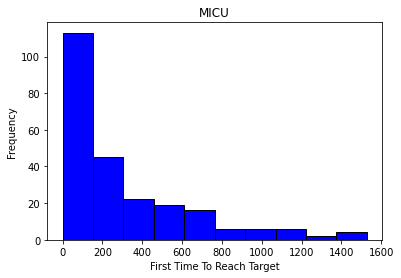

In [61]:
plt.hist(micu_first_target_dict.values(), bins=10, color='blue', edgecolor='black')
plt.xlabel('First Time To Reach Target')
plt.ylabel('Frequency')
plt.title('MICU')
plt.show()


In [115]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability', # Set the bin size to 30

        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('MICU_target.html')
fig.write_image('MICU target.png')



In [113]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),
         histnorm='probability', # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)


fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SICU_target.html')
fig.write_image('SICU target.png')



In [116]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability', # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('MED surg_target.html')
fig.write_image('MED target.png')


In [117]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        histnorm='probability', # Set the bin size to 30
        xbins=dict(size=30),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='Salzburg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SAL target.html')
fig.write_image('SAL target.png')


In [66]:
micu_first_target = list(micu_first_target_dict.values())
sicu_first_target = list(sicu_first_target_dict.values())
med_surg_first_target = list(med_first_target_dict.values())
sal_first_target = list(sal_first_target_dict.values())


In [67]:
print("first time to reach target:")
first_target_dict = {"micu": micu_first_target, "sicu": sicu_first_target, "med_surg": med_surg_first_target}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        #if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_target_dict[unit1], first_target_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

first time to reach target:
micu, micu KS pavlue: 1.0
micu, sicu KS pavlue: 0.13913036840070403
micu, med_surg KS pavlue: 0.44935535889873446
sicu, med_surg KS pavlue: 0.02949510113399023


In [68]:
micu_first_nor_time_df = MICU[MICU['drugrate'] > 0]
sicu_first_nor_time_df = SICU[SICU['drugrate'] > 0]
med_first_nor_time_df = MED[MED['drugrate'] > 0]
sal_first_nor_time_df = SAL[SAL['drugrate'] > 0]



micu_first_nor_time_dict = micu_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sicu_first_nor_time_dict = sicu_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
med_first_nor_time_dict = med_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sal_first_nor_time_dict = sal_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()

micu_first_nor_time_dict = {key: value for key, value in micu_first_nor_time_dict.items() if value >= 0}
sicu_first_nor_time_dict = {key: value for key, value in sicu_first_nor_time_dict.items() if value >= 0}
med_first_nor_time_dict = {key: value for key, value in med_first_nor_time_dict.items() if value >= 0}
sal_first_nor_time_dict = {key: value for key, value in sal_first_nor_time_dict.items() if value >= 0}


In [121]:
# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MICU_nor_time.png')
fig.write_html('MICU_nor_time.html')


In [123]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('SICU_nor_time.png')
fig.write_html('SICU_nor_time.html')


In [124]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MED_nor_time.png')
fig.write_html('MED_nor_time.html')


In [72]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='SAL distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SAL_nor_time.html')


In [73]:
print("time at first NOR:")
first_nor_time_dict = {"micu": list(micu_first_nor_time_dict.values()), "sicu": list(sicu_first_nor_time_dict.values()), "med_surg": list(med_first_nor_time_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_nor_time_dict[unit1], first_nor_time_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

time at first NOR:
micu, sicu KS pavlue: 0.6549829722673094
micu, med_surg KS pavlue: 0.08544804960779584
sicu, med_surg KS pavlue: 0.1621021143008058


In [74]:
micu_first_nor_map_dict = micu_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
sicu_first_nor_map_dict = sicu_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
med_first_nor_map_dict = med_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
sal_first_nor_map_dict = sal_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()


In [75]:
t = MICU[MICU['stay_id'] == 3224078]
t[['cur_bp', 'drugrate']]

,cur_bp,drugrate
565769,43.0,NaN
565770,44.0,NaN
565771,61.0,NaN
565772,73.0,NaN
565773,71.0,NaN
565774,67.0,25.0
565775,62.0,25.0
565776,59.0,25.0
565777,59.0,25.0
565778,58.0,25.0


In [76]:
sal_first_nor_map_dict

{100066: 58.999996185302734,
 100187: 102.00003814697266,
 100252: 64.0,
 100340: 51.00000381469727,
 100351: 86.99998474121094,
 100425: 104.99999237060548,
 100513: 77.99998474121094,
 100579: 67.81999969482422,
 100625: 80.00003051757812,
 100764: 58.0,
 100774: 49.0,
 100824: 55.999996185302734,
 100849: 57.00000381469727,
 100946: 94.0000228881836,
 100956: 85.00001525878906,
 101041: 64.22000122070312,
 101104: 94.0000228881836,
 101108: 75.0,
 101172: 72.0,
 101186: 66.0,
 101253: 64.0,
 101275: 65.0,
 101278: 69.0,
 101324: 52.0,
 101419: 77.99998474121094,
 101497: 107.00003814697266,
 101568: 43.0,
 101575: 81.00000762939453,
 101597: 64.0,
 101866: 109.0,
 101871: 77.99998474121094,
 101904: 64.0,
 101988: 102.00003814697266,
 102062: 67.0,
 102228: 35.87000274658203,
 102230: 57.00000381469727,
 102354: 72.0,
 102492: 92.99996185302734,
 102547: 69.0,
 102766: 64.0,
 102823: 63.0,
 102886: 81.99999237060547,
 103046: 80.00003051757812,
 103129: 38.00000381469727,
 103216: 8

In [131]:
# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MICU_nor_map.png')
fig.write_html('MICU_nor_map.html')


In [134]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('SICU_nor_map.png')
fig.write_html('SICU_nor_map.html')


In [133]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MED_nor_map.png')
fig.write_html('MED_nor_map.html')


In [80]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='SAL distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SAL_nor_map.html')


In [81]:
print("MAP at first NOR:")
first_nor_map_dict = {"micu": list(micu_first_nor_map_dict.values()), "sicu": list(sicu_first_nor_map_dict.values()), "med_surg": list(med_first_nor_map_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_nor_map_dict[unit1], first_nor_map_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

MAP at first NOR:
micu, sicu KS pavlue: 0.4502383472678779
micu, med_surg KS pavlue: 0.6386205055948617
sicu, med_surg KS pavlue: 0.26709420369840464


In [82]:
perm_target_micu = pd.DataFrame(micu_first_target_dict.values())
perm_target_sicu = pd.DataFrame(sicu_first_target_dict.values())
micu_sicu_target = pd.concat([perm_target_micu, perm_target_sicu])
micu_sicu_target

,0
0,1522
1,546
2,94
3,80
4,6
...,...
100,225
101,265
102,504
103,121


In [83]:
perm_target_micu = list(micu_first_target_dict.values())
perm_target_sicu = list(sicu_first_target_dict.values())
perm_target_med = list(med_first_target_dict.values())

micu_sicu_target = perm_target_micu + perm_target_sicu
micu_med_target = perm_target_micu + perm_target_med
sicu_med_target = perm_target_sicu + perm_target_med

In [84]:
mean_target_micu = sum(perm_target_micu) / len(perm_target_micu)
mean_target_sicu = sum(perm_target_sicu) / len(perm_target_sicu)
mean_target_med = sum(perm_target_med) / len(perm_target_med)

In [85]:
delta_micu_sicu = mean_target_micu - mean_target_sicu
delta_med_micu = mean_target_med - mean_target_micu
delta_med_sicu = mean_target_med - mean_target_sicu
delta_med_sicu

51.108096789204296

In [86]:
abs_delta_micu_sicu = abs(mean_target_micu - mean_target_sicu)
abs_delta_med_micu = abs(mean_target_med - mean_target_micu)
abs_delta_med_sicu = abs(mean_target_med - mean_target_sicu)
abs_delta_med_sicu

51.108096789204296

In [87]:
perm_deltas = []
for i in range(10000):
    random.shuffle(micu_sicu_target)
    sampled_micu_target = micu_sicu_target[:239]
    sampled_sicu_target = micu_sicu_target[239:]
    mean_target_sampled_micu = sum(sampled_micu_target) / len(sampled_micu_target)
    mean_target_sampled_sicu = sum(sampled_sicu_target) / len(sampled_sicu_target)
    delta = abs(mean_target_sampled_micu - mean_target_sampled_sicu)
    perm_deltas.append(delta)

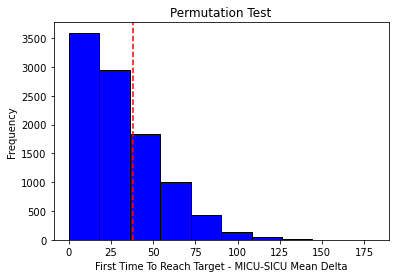

In [88]:
plt.hist(perm_deltas, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [89]:
counter = 0
for value in perm_deltas:
    if value >= abs_delta_micu_sicu:
        counter += 1
pvalue = counter / len(perm_deltas)
pvalue

0.3226

In [99]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target - MICU-SICU Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_micu_sicu.html')
fig.write_image('micu sicu target.png')



In [100]:
counter = 0
for value in perm_deltas:
    if value >= abs_delta_micu_sicu:
        counter += 1
pvalue = counter / len(perm_deltas)
pvalue

0.3226

In [101]:
perm_deltas2 = []
for i in range(10000):
    random.shuffle(micu_med_target)
    sampled_micu_target = micu_med_target[:239]
    sampled_med_target = micu_med_target[239:]
    mean_target_sampled_micu = sum(sampled_micu_target) / len(sampled_micu_target)
    mean_target_sampled_med = sum(sampled_med_target) / len(sampled_med_target)

    delta = abs(mean_target_sampled_med - mean_target_sampled_micu)
    perm_deltas2.append(delta)

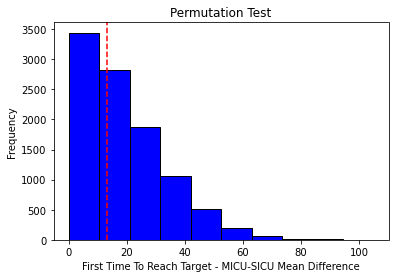

In [102]:
plt.hist(perm_deltas2, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs(delta_med_micu), color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [103]:
counter = 0
for value in perm_deltas2:
    if value >= abs_delta_med_micu:
        counter += 1
pvalue = counter / len(perm_deltas2)
pvalue

0.5775

In [104]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas2

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target - MICU-MED-surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_micu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_micu_med.html')
fig.write_image('micu med target.png')



In [105]:
abs_delta_med_micu

13.235652079102692

In [106]:
perm_deltas3 = []
for i in range(10000):
    random.shuffle(sicu_med_target)
    sampled_sicu_target = sicu_med_target[:105]
    sampled_med_target = sicu_med_target[105:]
    mean_target_sampled_sicu = sum(sampled_sicu_target) / len(sampled_sicu_target)
    mean_target_sampled_med = sum(sampled_med_target) / len(sampled_med_target)

    delta = abs(mean_target_sampled_med - mean_target_sampled_sicu)
    perm_deltas3.append(delta)

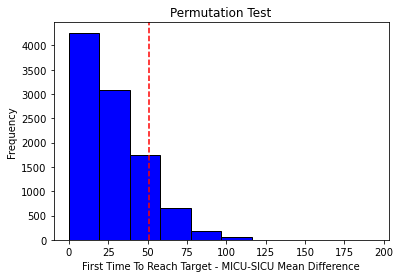

In [107]:
plt.hist(perm_deltas3, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_sicu, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [108]:
perm_deltas3

[17.05127190941522,
 31.848138669148454,
 26.91684504420664,
 10.975430432759424,
 0.768698619512918,
 16.38227857918406,
 13.112439894524584,
 40.322429036761264,
 25.952411974561812,
 31.576361098185203,
 31.18649759578102,
 10.858724988366703,
 34.20523499302004,
 66.4675895765472,
 71.26448735846134,
 14.635132619823139,
 45.336427795874044,
 42.17594229874362,
 56.39823949123627,
 38.51624011167985,
 17.43676903986352,
 11.727128897161492,
 0.17942453854504947,
 69.19984488909571,
 10.672638436482089,
 43.930440514968154,
 16.64073212346824,
 37.0762525205522,
 45.329075539010375,
 27.42042810609587,
 9.308003722661681,
 49.75380021715529,
 29.211912517449946,
 40.10532805956257,
 52.01785326508457,
 4.397386381262606,
 1.9192182410423584,
 42.89961222273922,
 5.54790600279199,
 0.01700015511090669,
 17.219668062664823,
 3.552644640918288,
 1.4540018613308803,
 23.264495114006536,
 46.204831704668834,
 41.948503179773525,
 33.75035675507985,
 19.45270668528002,
 23.949798355824385

In [109]:
counter = 0
for value in perm_deltas3:
    if value >= abs_delta_med_sicu:
        counter += 1
pvalue = counter / len(perm_deltas3)
pvalue

0.1368

In [110]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas3

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target - SICU-MED-surg Mean Diffrence. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_sicu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_sicu_med.html')
fig.write_image('sicu med target.png')


In [1059]:
perm_nor_time_micu = list(micu_first_nor_time_dict.values())
perm_nor_time_sicu = list(sicu_first_nor_time_dict.values())
perm_nor_time_med = list(med_first_nor_time_dict.values())

micu_sicu_nor_time = perm_nor_time_micu + perm_nor_time_sicu
micu_med_nor_time = perm_nor_time_micu + perm_nor_time_med
sicu_med_nor_time = perm_nor_time_sicu + perm_nor_time_med

In [1060]:
mean_nor_time_micu = sum(perm_nor_time_micu) / len(perm_nor_time_micu)
mean_nor_time_sicu = sum(perm_nor_time_sicu) / len(perm_nor_time_sicu)
mean_nor_time_med = sum(perm_nor_time_med) / len(perm_nor_time_med)

In [1061]:
abs_delta_micu_sicu_nor_time = abs(mean_nor_time_micu - mean_nor_time_sicu)
abs_delta_micu_med_nor_time = abs(mean_nor_time_med - mean_nor_time_micu)
abs_delta_sicu_med_nor_time = abs(mean_nor_time_med - mean_nor_time_sicu)
abs_delta_micu_sicu_nor_time

18.34558490566036

In [1062]:
len(perm_nor_time_sicu)

106

In [1063]:
perm_deltas4 = []
for i in range(10000):
    random.shuffle(micu_sicu_nor_time)
    sampled_micu_nor_time = micu_sicu_nor_time[:250]
    sampled_sicu_nor_time = micu_sicu_nor_time[250:]
    mean_nor_time_sampled_micu = sum(sampled_micu_nor_time) / len(sampled_micu_nor_time)
    mean_nor_time_sampled_sicu = sum(sampled_sicu_nor_time) / len(sampled_sicu_nor_time)
    delta = abs(mean_nor_time_sampled_micu - mean_nor_time_sampled_sicu)
    perm_deltas4.append(delta)

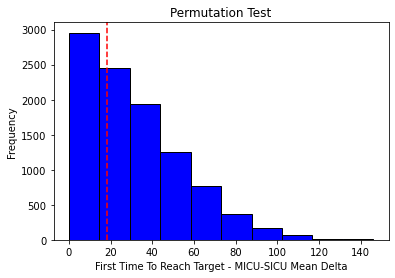

In [1064]:
plt.hist(perm_deltas4, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1065]:
counter = 0
for value in perm_deltas4:
    if value >= abs_delta_micu_sicu_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas4)
pvalue

0.6345

In [1066]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas4

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time at first NOR - MICU-SICU-surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_time_micu_sicu.html')


In [1067]:
perm_deltas5 = []
for i in range(10000):
    random.shuffle(micu_med_nor_time)
    sampled_micu_nor_time = micu_med_nor_time[:250]
    sampled_med_nor_time = micu_med_nor_time[250:]
    mean_nor_time_sampled_micu = sum(sampled_micu_nor_time) / len(sampled_micu_nor_time)
    mean_nor_time_sampled_med = sum(sampled_med_nor_time) / len(sampled_med_nor_time)
    delta = abs(mean_nor_time_sampled_med - mean_nor_time_sampled_micu)
    perm_deltas5.append(delta)

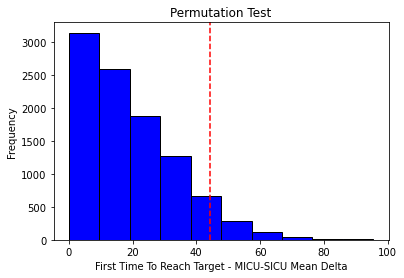

In [1068]:
plt.hist(perm_deltas5, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_med_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1069]:
counter = 0
for value in perm_deltas5:
    if value >= abs_delta_micu_med_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas5)
pvalue

0.066

In [1070]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas5

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time at first NOR - MICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_med_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_time_micu_med.html')


In [1071]:
abs_delta_micu_med_nor_time

44.31816006467261

In [1072]:
perm_deltas6 = []
for i in range(10000):
    random.shuffle(sicu_med_nor_time)
    sampled_sicu_nor_time = sicu_med_nor_time[:106]
    sampled_med_nor_time = sicu_med_nor_time[106:]
    mean_nor_time_sampled_sicu = sum(sampled_sicu_nor_time) / len(sampled_sicu_nor_time)
    mean_nor_time_sampled_med = sum(sampled_med_nor_time) / len(sampled_med_nor_time)
    delta = abs(mean_nor_time_sampled_med - mean_nor_time_sampled_sicu)
    perm_deltas6.append(delta)

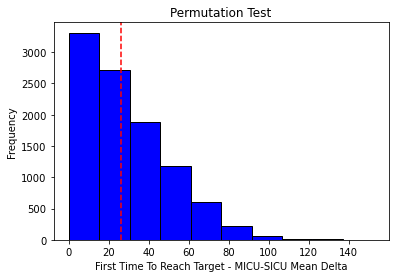

In [1073]:
plt.hist(perm_deltas6, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_sicu_med_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1074]:
counter = 0
for value in perm_deltas6:
    if value >= abs_delta_sicu_med_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas6)
pvalue

0.4685

In [1075]:
abs_delta_sicu_med_nor_time

25.97257515901225

In [1076]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas6

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time at first NOR - SICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_sicu_med_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_time_sicu_med.html')


In [1077]:
perm_nor_map_micu = list(micu_first_nor_map_dict.values())
perm_nor_map_sicu = list(sicu_first_nor_map_dict.values())
perm_nor_map_med = list(med_first_nor_map_dict.values())

micu_sicu_nor_map = perm_nor_map_micu + perm_nor_map_sicu
micu_med_nor_map = perm_nor_map_micu + perm_nor_map_med
sicu_med_nor_map = perm_nor_map_sicu + perm_nor_map_med

In [1078]:
mean_nor_map_micu = sum(perm_nor_map_micu) / len(perm_nor_map_micu)
mean_nor_map_sicu = sum(perm_nor_map_sicu) / len(perm_nor_map_sicu)
mean_nor_map_med = sum(perm_nor_map_med) / len(perm_nor_map_med)

In [1079]:
abs_delta_micu_sicu_nor_map = abs(mean_nor_map_micu - mean_nor_map_sicu)
abs_delta_med_micu_nor_map = abs(mean_nor_map_med - mean_nor_map_micu)
abs_delta_med_sicu_nor_map = abs(mean_nor_map_med - mean_nor_map_sicu)


In [1080]:
perm_deltas7 = []
for i in range(10000):
    random.shuffle(micu_sicu_nor_map)
    sampled_micu_nor_map = micu_sicu_nor_map[:251]
    sampled_sicu_nor_map = micu_sicu_nor_map[251:]
    mean_nor_map_sampled_micu = sum(sampled_micu_nor_map) / len(sampled_micu_nor_map)
    mean_nor_map_sampled_sicu = sum(sampled_sicu_nor_map) / len(sampled_sicu_nor_map)
    delta = abs(mean_nor_map_sampled_micu - mean_nor_map_sampled_sicu)
    perm_deltas7.append(delta)

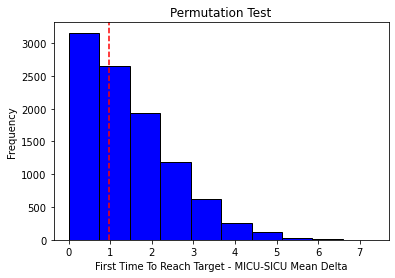

In [1081]:
plt.hist(perm_deltas7, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1106]:
counter = 0
for value in perm_deltas7:
    if value >= abs_delta_micu_sicu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas7)
pvalue

0.5877

In [1107]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas7

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.2),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP at first NOR - MICU-SICU Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_MAP_micu_sicu.html')


In [1084]:
abs_delta_micu_sicu_nor_map

0.9772607682477599

In [1108]:
perm_deltas8 = []
for i in range(10000):
    random.shuffle(micu_med_nor_map)
    sampled_micu_nor_map = micu_med_nor_map[:250]
    sampled_med_nor_map = micu_med_nor_map[250:]
    mean_nor_map_sampled_micu = sum(sampled_micu_nor_map) / len(sampled_micu_nor_map)
    mean_nor_map_sampled_med = sum(sampled_med_nor_map) / len(sampled_med_nor_map)
    delta = abs(mean_nor_map_sampled_med - mean_nor_map_sampled_micu)
    perm_deltas8.append(delta)

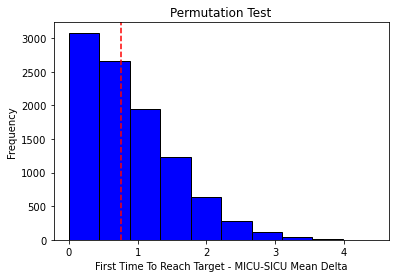

In [1109]:
plt.hist(perm_deltas8, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_micu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1110]:
abs_delta_med_micu_nor_map

0.7625813386196683

In [1111]:
counter = 0
for value in perm_deltas8:
    if value >= abs_delta_med_micu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas8)
pvalue

0.4942

In [1112]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas8

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP at first NOR - MICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_micu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_MAP_micu_med.html')


In [1113]:
perm_deltas9 = []
for i in range(10000):
    random.shuffle(sicu_med_nor_map)
    sampled_sicu_nor_map = sicu_med_nor_map[:106]
    sampled_med_nor_map = sicu_med_nor_map[106:]
    mean_nor_map_sampled_sicu = sum(sampled_sicu_nor_map) / len(sampled_sicu_nor_map)
    mean_nor_map_sampled_med = sum(sampled_med_nor_map) / len(sampled_med_nor_map)
    delta = abs(mean_nor_map_sampled_med - mean_nor_map_sampled_sicu)
    perm_deltas9.append(delta)

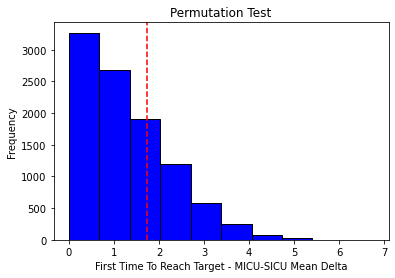

In [1114]:
plt.hist(perm_deltas9, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_sicu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [1115]:
counter = 0
for value in perm_deltas9:
    if value >= abs_delta_med_sicu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas9)
pvalue

0.2846

In [1116]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas9

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.1),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP at first NOR - SICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_sicu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_MAP_sicu_med.html')


In [1094]:
statistic, p_value = scipy.stats.mannwhitneyu(list(micu_first_target_dict.values()), list(sicu_first_target_dict.values()))
p_value

0.1640469091138511

In [1095]:
micu_first_target_dict.values()

dict_values([1522, 546, 94, 80, 6, 1126, 70, 9, 9, 156, 71, 127, 22, 77, 6, 172, 6, 651, 482, 39, 17, 13, 191, 132, 136, 205, 66, 291, 136, 105, 52, 41, 1393, 183, 773, 8, 939, 128, 97, 62, 293, 665, 41, 117, 827, 489, 302, 297, 181, 76, 167, 137, 12, 297, 57, 67, 263, 397, 12, 250, 231, 692, 52, 147, 94, 23, 271, 36, 316, 101, 67, 830, 137, 747, 118, 387, 1254, 51, 142, 7, 152, 1157, 692, 193, 33, 412, 158, 125, 148, 480, 355, 200, 834, 324, 500, 324, 220, 1022, 102, 283, 1284, 70, 611, 703, 124, 330, 80, 135, 0, 27, 337, 617, 619, 490, 405, 338, 0, 21, 910, 460, 364, 65, 478, 28, 140, 95, 260, 185, 30, 503, 940, 427, 180, 517, 42, 1087, 130, 1165, 12, 191, 205, 157, 744, 934, 45, 878, 381, 444, 38, 671, 7, 512, 56, 56, 160, 238, 276, 159, 210, 93, 547, 65, 135, 238, 95, 6, 446, 679, 132, 55, 1426, 171, 96, 347, 72, 177, 368, 116, 34, 144, 24, 960, 142, 626, 752, 75, 142, 161, 573, 207, 558, 1528, 131, 228, 32, 171, 39, 122, 61, 75, 160, 15, 38, 84, 204, 304, 760, 360, 234, 382, 500, 

In [1096]:
print("first time to reach target:")
first_target_dict = {"micu": micu_first_target, "sicu": sicu_first_target, "med_surg": med_surg_first_target}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_target_dict[unit1], first_target_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

first time to reach target:
micu, sicu Mann Whitney U pavlue: 0.1640469091138511
micu, med_surg Mann Whitney U pavlue: 0.4122060004420909
sicu, med_surg Mann Whitney U pavlue: 0.03164638310103364


In [1097]:
print("time at first NOR:")
first_nor_time_dict = {"micu": list(micu_first_nor_time_dict.values()), "sicu": list(sicu_first_nor_time_dict.values()), "med_surg": list(med_first_nor_time_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_nor_time_dict[unit1], first_nor_time_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

time at first NOR:
micu, sicu Mann Whitney U pavlue: 1.0
micu, med_surg Mann Whitney U pavlue: 0.03553286327157833
sicu, med_surg Mann Whitney U pavlue: 0.1853980118274975


In [1098]:
len(list(micu_first_nor_time_dict.values()))

250

In [1099]:
len(list(sicu_first_nor_time_dict.values()))

106

In [1100]:
statistic, p_value = scipy.stats.mannwhitneyu(list(micu_first_nor_time_dict.values()), list(sicu_first_nor_time_dict.values()))
p_value

1.0

In [1101]:
print("MAP at first NOR:")
first_nor_map_dict = {"micu": list(micu_first_nor_map_dict.values()), "sicu": list(sicu_first_nor_map_dict.values()), "med_surg": list(med_first_nor_map_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_nor_map_dict[unit1], first_nor_map_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

MAP at first NOR:
micu, sicu Mann Whitney U pavlue: 0.28589549650409096
micu, med_surg Mann Whitney U pavlue: 0.4852761486970415
sicu, med_surg Mann Whitney U pavlue: 0.07929651004517098


In [1102]:
a = [1, 1]
b = [4, 4]
statistic, p_value = scipy.stats.ks_2samp(a,b)

In [1103]:
statistic

1.0

In [1010]:
p_value

1.0

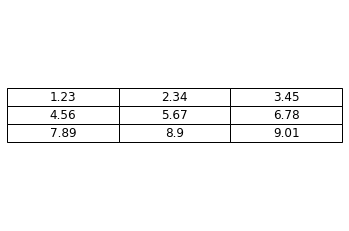

In [27]:
import matplotlib.pyplot as plt

# Create a 3x3 grid of floats (example data)
data = [[1.23, 2.34, 3.45],
        [4.56, 5.67, 6.78],
        [7.89, 8.90, 9.01]]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a table and add it to the axis
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Customize the appearance of the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the table size if needed

# Hide axis
ax.axis('off')

# Show the table
plt.show()


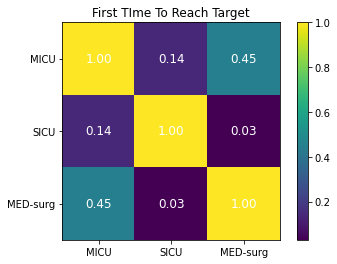

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.139, 0.449],
                 [0.139, 1, 0.029],
                 [0.449, 0.029, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First TIme To Reach Target')
plt.show()
plt.savefig('heatmap_with_labels.png', bbox_inches='tight')  # Adjust 'bbox_inches' to include labels


In [ ]:
micu, sicu KS pavlue: 0.13913036840070403
micu, med_surg KS pavlue: 0.44935535889873446
sicu, med_surg KS pavlue: 0.02949510113399023


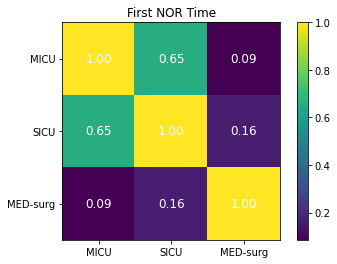

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.6549829722673094, 0.08544804960779584],
                 [0.6549829722673094, 1, 0.1621021143008058],
                 [0.08544804960779584, 0.1621021143008058, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First NOR Time')
plt.show()
plt.savefig('KS NOR time.png', bbox_inches='tight')  # Adjust 'bbox_inches' to include labels


In [ ]:
time at first NOR:
micu, sicu KS pavlue: 0.6549829722673094
micu, med_surg KS pavlue: 0.08544804960779584
sicu, med_surg KS pavlue: 0.1621021143008058


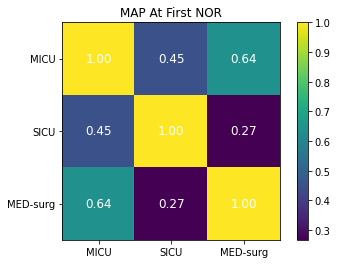

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.4502383472678779,  0.6386205055948617],
                 [0.4502383472678779, 1, 0.26709420369840464],
                 [ 0.6386205055948617, 0.26709420369840464, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('MAP At First NOR')
plt.show()


In [ ]:
MAP at first NOR:
micu, sicu KS pavlue: 0.4502383472678779
micu, med_surg KS pavlue: 0.6386205055948617
sicu, med_surg KS pavlue: 0.26709420369840464


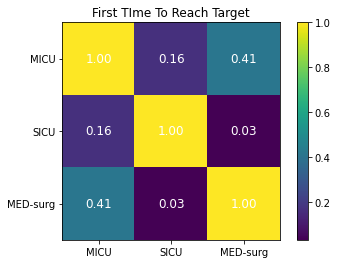

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.1640469091138511, 0.4122060004420909],
                 [0.1640469091138511, 1,  0.03164638310103364],
                 [0.4122060004420909,  0.03164638310103364, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First TIme To Reach Target')
plt.show()
plt.savefig('heatmap_with_labels.png', bbox_inches='tight')  # Adjust 'bbox_inches' to include labels


In [ ]:
first time to reach target:
micu, sicu Mann Whitney U pavlue: 0.1640469091138511
micu, med_surg Mann Whitney U pavlue: 0.4122060004420909
sicu, med_surg Mann Whitney U pavlue: 0.03164638310103364


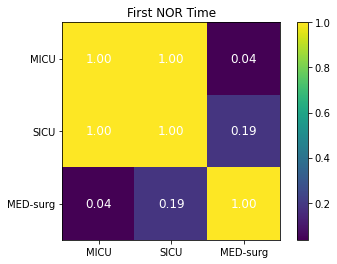

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 1, 0.03553286327157833],
                 [1, 1, 0.1853980118274975],
                 [0.03553286327157833, 0.1853980118274975, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First NOR Time')
plt.show()


In [ ]:
time at first NOR:
micu, sicu Mann Whitney U pavlue: 1.0
micu, med_surg Mann Whitney U pavlue: 0.03553286327157833
sicu, med_surg Mann Whitney U pavlue: 0.1853980118274975


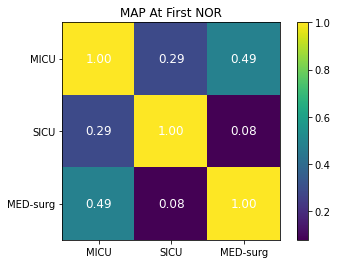

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.28589549650409096,  0.4852761486970415],
                 [0.28589549650409096, 1, 0.0792965100451709],
                 [0.4852761486970415, 0.0792965100451709, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('MAP At First NOR')
plt.show()


In [ ]:
MAP at first NOR:
micu, sicu Mann Whitney U pavlue: 0.28589549650409096
micu, med_surg Mann Whitney U pavlue: 0.4852761486970415
sicu, med_surg Mann Whitney U pavlue: 0.07929651004517098


NameError: name 'perm_deltas' is not defined